In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report



In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
file_path='/content/drive/My Drive/Machine learning/ObesityDataSet_raw_and_data_sinthetic.csv'
df=pd.read_csv(file_path)
print(dataset.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [20]:
X = df.drop(columns=['NObeyesdad'])  # 'NObeyesdad' is the target column
y = df['NObeyesdad']

# Label encode the target
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )


In [22]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)


SVC()

In [23]:
y_pred = svm_rbf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Confusion Matrix:
 [[50  4  0  0  0  0  0]
 [ 4 42  0  0  0 10  2]
 [ 0  4 64  1  0  0  1]
 [ 0  3  1 56  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  9  1  0  0 41  7]
 [ 0  7  5  1  0  3 42]]
Accuracy: 0.8486997635933806
Precision: 0.8503048768755018
Recall: 0.8447618245647802
F1 Score: 0.8463354886547496


In [28]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for k in kernels:
  model = SVC(kernel=k, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  results[k] = acc
  print(f"Kernel: {k}, Accuracy: {acc:.3f}")


Kernel: linear, Accuracy: 0.955
Kernel: poly, Accuracy: 0.745
Kernel: rbf, Accuracy: 0.849
Kernel: sigmoid, Accuracy: 0.610


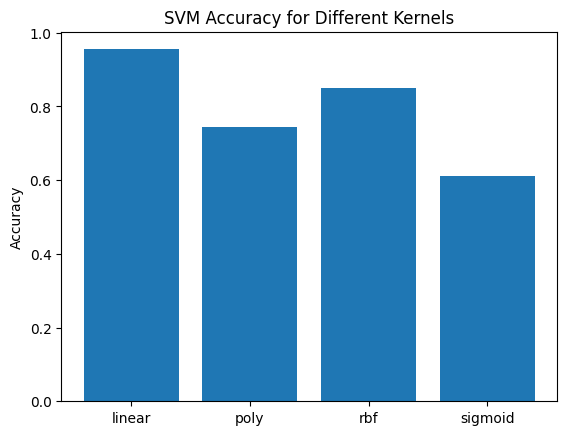

In [29]:
plt.bar(results.keys(), results.values())
plt.title("SVM Accuracy for Different Kernels")
plt.ylabel("Accuracy")
plt.show()


In [31]:
from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for k in kernels:
    model = SVC(kernel=k, random_state=42)
    scores = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring)
    print(f"\nKernel: {k}")
    print("Mean Accuracy:", np.mean(scores['test_accuracy']))
    print("Mean Precision:", np.mean(scores['test_precision_macro']))
    print("Mean Recall:", np.mean(scores['test_recall_macro']))
    print("Mean F1:", np.mean(scores['test_f1_macro']))



Kernel: linear
Mean Accuracy: 0.9507321882737836
Mean Precision: 0.9503715998695196
Mean Recall: 0.9497631582752273
Mean F1: 0.9490747308292213

Kernel: poly
Mean Accuracy: 0.7688100119883926
Mean Precision: 0.7780857433266719
Mean Recall: 0.7632182425876797
Mean F1: 0.7640791365205358

Kernel: rbf
Mean Accuracy: 0.8630925571129262
Mean Precision: 0.8655492821506447
Mean Recall: 0.86077154426923
Mean F1: 0.8612256524892178

Kernel: sigmoid
Mean Accuracy: 0.6257817664392233
Mean Precision: 0.6149785620340719
Mean Recall: 0.6162788180535137
Mean F1: 0.6142388658708068


In [32]:
print("First 5 Support Vectors (RBF Kernel):")
print(svm_rbf.support_vectors_[:5])


First 5 Support Vectors (RBF Kernel):
[[-0.65252766 -1.03080566 -1.60109411  1.08834176  0.26759502 -1.64490507
  -0.28289541 -1.08062463 -1.01191369 -2.11733722 -2.75976929  2.77905389
  -2.2585739  -0.15734447 -0.14590027  4.581439   -0.18519426  0.71188543
  -0.65886513 -0.05768012 -0.07237469  0.57972058 -0.16507758]
 [-0.80400158 -1.43323819 -1.70524138 -0.65207755 -2.16702273 -0.54019573
  -1.18803911  1.74224157 -1.01191369 -2.11733722  0.36234913 -0.35983469
   0.44275726 -0.15734447 -0.14590027 -0.21827203 -0.18519426  0.71188543
  -0.65886513 -0.05768012 -0.07237469  0.57972058 -0.16507758]
 [-1.14227991 -0.57745266 -1.41234665  1.08834176  1.13190079 -0.92951327
   1.16382038  0.56199675 -1.01191369 -2.11733722  0.36234913 -0.35983469
   0.44275726 -0.15734447 -0.14590027 -0.21827203 -0.18519426  0.71188543
  -0.65886513 -0.05768012 -0.07237469  0.57972058 -0.16507758]
 [-0.20398204 -1.25309764 -1.61197149 -0.40114092 -0.71714075  0.18322305
  -0.01712471 -1.08062463 -1.0119